# Final project workbook
## Josh Horan

For this project, we will be analyzing the neighborhoods in Oakland to determine the healthiest neigborhood.  We came up with this metric as the health of a specific area often highlights a variety of other factors in a neighborhood.  Additionally, there are many ways to analyze this metric, so differeing data can be used.  
In this notebook we will be looking specifically at Air Quality.

In [2]:
import pandas as pd

air = pd.read_csv("airq.csv",sep=",")
air.head()

,date,site,parameter,index_value,description,health_advisory,health_effects
0,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
3,2016-01-01,Avalon,SO2,10,Good,NaN,NaN
4,2016-01-01,Lincoln,PM25,35,Good,NaN,NaN


As seen above, the data is organized in terms of the date of the reading, where the reading was taken and, any needed health advisories. 

In [52]:
air['site'].value_counts()

Parkway East             6804
North Braddock           4882
Lawrenceville 2          4528
Liberty 2                4468
South Fayette            4406
Harrison Township        4367
Flag Plaza               4002
Avalon                   3843
Lawrenceville            3805
Lincoln                  3574
Liberty                  2285
Glassport High Street    2272
Pittsburgh                904
Clairton                  329
West Mifflin              301
Name: site, dtype: int64

This list is the number of air reading

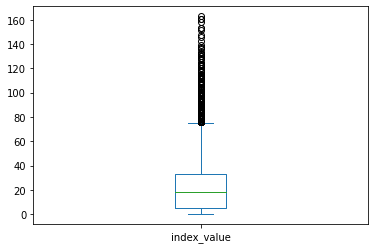

In [3]:
#Safe air quality versus unsafe air qualities.
#This is determined by taking the total number of moderate,  air quality readings and dividing by the total number of readings
air["index_value"].plot.box()
#df["weight"].plot.density()

The above graph shows the differing air quality in each region.  The lower the number, the higher the air quality.  Most areas often have a safe/no risk attribution however, in some regions air quality is significantly worse.

In [4]:
items=dict()
count=0
item_list=[]
cost=0
while len(air)>count:
    name=air.iat[count,4]
    if name=="Moderate":
        town=air.iat[count,1]
        
        item_list.append(town)
    count+=1
for c in item_list:
    
    if c not in items:
        items[c] = 1
    else:
        items[c] = items[c] + 1
    
print(items)

{'Lincoln': 796, 'Avalon': 511, 'Lawrenceville': 651, 'Parkway East': 644, 'Glassport High Street': 14, 'Liberty 2': 866, 'North Braddock': 132, 'Liberty': 114, 'South Fayette': 148, 'Flag Plaza': 3, 'Harrison Township': 88, 'Clairton': 2, 'Pittsburgh': 121}


In [23]:
items=dict()
count=0
item_list=[]
cost=0
while len(air)>count:
    name=air.iat[count,4]
    if name=="Unhealthy for Sensitive Groups":
        town=air.iat[count,1]
        
        item_list.append(town)
    count+=1
for c in item_list:
    
    if c not in items:
        items[c] = 1
    else:
        items[c] = items[c] + 1
print(items)

{'Lincoln': 23, 'Liberty 2': 35, 'South Fayette': 7, 'Lawrenceville': 5, 'Harrison Township': 8, 'Liberty': 12, 'Parkway East': 2, 'North Braddock': 2, 'Avalon': 2, 'Pittsburgh': 2}


In [25]:
items=dict()
count=0
item_list=[]
cost=0
while len(air)>count:
    name=air.iat[count,4]
    if name=="Unhealthy":
        town=air.iat[count,1]
        
        item_list.append(town)
    count+=1
for c in item_list:
    
    if c not in items:
        items[c] = 1
    else:
        items[c] = items[c] + 1
print(items)

{'Lincoln': 1, 'Liberty 2': 5, 'Parkway East': 1}


In [5]:
items=dict()
count=0
item_list=[]
item_list2=[]
cost=0
while len(air)>count:
    
    name=air.iat[count,4]
    town=air.iat[count,1]
        
    item_list2.append(town)
    if name!="Good":
        town=air.iat[count,1]
        
        item_list.append(town)
    count+=1
for c in item_list:
    
    if c not in items:
        items[c] = 1
    else:
        items[c] = items[c] + 1
        
        
        
        

for i in items:
    print("The percentage of good air quality days are "+i +" is "+"{:.2f}".format(100-(items[i]/item_list2.count(i))*100)+" %")

The percentage of good air quality days are Lincoln is 77.06 %
The percentage of good air quality days are Avalon is 86.65 %
The percentage of good air quality days are Lawrenceville is 82.76 %
The percentage of good air quality days are Liberty 2 is 79.72 %
The percentage of good air quality days are Parkway East is 90.49 %
The percentage of good air quality days are Glassport High Street is 99.38 %
The percentage of good air quality days are North Braddock is 97.26 %
The percentage of good air quality days are Liberty is 94.49 %
The percentage of good air quality days are South Fayette is 96.48 %
The percentage of good air quality days are Flag Plaza is 99.93 %
The percentage of good air quality days are Harrison Township is 97.80 %
The percentage of good air quality days are Clairton is 99.39 %
The percentage of good air quality days are Pittsburgh is 86.39 %


### Conclusion
    Overall this data set shows that Clariton, Flag Plaza, and Glassport High Street all have very good day to day air quality. However, when looking at the number of readings, Clairton by far has the fewest readings.  This must be consider when declaring it the best neighborhood as there is a very small amount of samples.  Overall from this data set we see that Flag Plaza has the best day to day air quality.  This metric will then be compared to the other data sets to determine what the best neighborhood is.    